In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split


num_words = 10000
(X, y), _ = imdb.load_data(num_words=num_words)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Number of training samples: {len(X_train)}")
print(f"Number of test samples: {len(X_test)}")


Number of training samples: 17500
Number of test samples: 7500


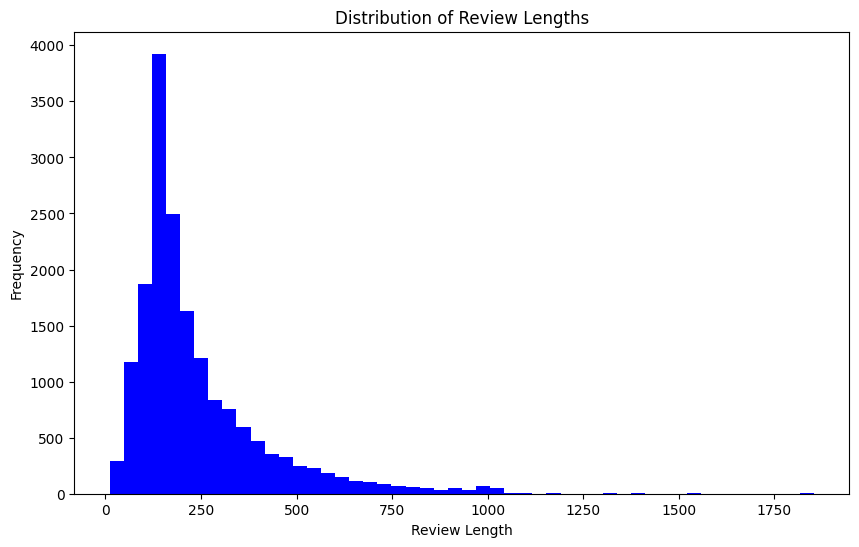

In [ ]:
import matplotlib.pyplot as plt

# Review lengths
review_lengths = [len(review) for review in X_train]
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=50, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

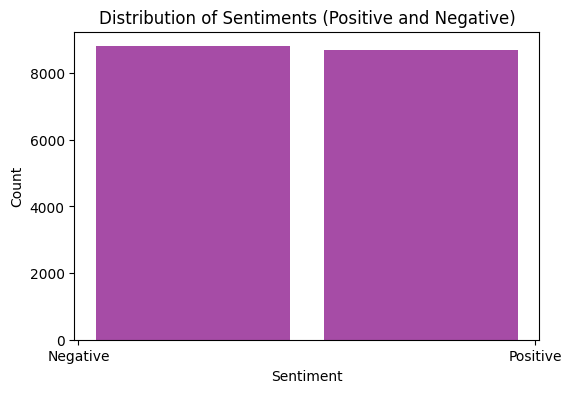

In [ ]:
import matplotlib.pyplot as plt

# Distribution of classes in the dataset
plt.figure(figsize=(6, 4))
plt.hist(y_train, bins=2, color="purple", alpha=0.7, rwidth=0.85)
plt.title('Distribution of Sentiments (Positive and Negative)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the maximum review length
maxlen = 200

# Pad sequences to ensure uniform input size
X_train_padded = pad_sequences(X_train, maxlen=maxlen, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test, maxlen=maxlen, padding='post', truncating='post')

print(f"Shape of padded training data: {X_train_padded.shape}")
print(f"Shape of padded test data: {X_test_padded.shape}")


Shape of padded training data: (17500, 200)
Shape of padded test data: (7500, 200)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout


model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    Conv1D(64, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)


Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - accuracy: 0.5876 - loss: 0.6610 - val_accuracy: 0.7834 - val_loss: 0.4657
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.8016 - loss: 0.4417 - val_accuracy: 0.8331 - val_loss: 0.3747
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 43s 106ms/step - accuracy: 0.8811 - loss: 0.2988 - val_accuracy: 0.8483 - val_loss: 0.3514
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.9317 - loss: 0.1981 - val_accuracy: 0.8466 - val_loss: 0.3634
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.9639 - loss: 0.1203 - val_accuracy: 0.8411 - val_loss: 0.4101


In [ ]:
# Model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 200, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 196, 64)             │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,963,269 (15.12 MB)

 Trainable params: 1,321,089 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,642,180 (10.08 MB)

1. **Embedding Layer (`embedding_3`)**:
   - **Output Shape**: `(None, 200, 128)`
   - **Parameters**: 1,280,000
   - **Description**: This layer converts integer-encoded words into dense vectors of fixed size (128 dimensions). The input shape indicates that the model expects sequences of length 200. The `None` indicates that the batch size can vary. This layer helps capture semantic relationships between words.

2. **1D Convolutional Layer (`conv1d_1`)**:
   - **Output Shape**: `(None, 196, 64)`
   - **Parameters**: 41,024
   - **Description**: This layer applies 1D convolutional filters to the embedded sequences. The output shape indicates that the convolution reduces the sequence length from 200 to 196, while producing 64 feature maps. This layer helps in extracting local features from the sequences.

3. **Global Max Pooling Layer (`global_max_pooling1d_1`)**:
   - **Output Shape**: `(None, 64)`
   - **Parameters**: 0
   - **Description**: This layer performs global max pooling, which reduces the output from the convolutional layer to a fixed size by taking the maximum value across the sequence length for each feature map. This helps in summarizing the features extracted by the convolutional layer.


4. **Dropout Layer (`dropout_1`)**:
   - **Output Shape**: `(None, 64)`
   - **Parameters**: 0
   - **Description**: This layer randomly sets a fraction of the input units to 0 during training, which helps prevent overfitting. It retains the output size of 64.

5. **Dense Layer (`dense_3`)**:
   - **Output Shape**: `(None, 1)`
   - **Parameters**: 65
   - **Description**: This is a fully connected layer that outputs a single value, which is typically used for binary classification tasks. The small number of parameters indicates that it has a single neuron.

**Total Parameters**
- **Total Params**: 3,963,269 (15.12 MB)
- **Trainable Params**: 1,321,089 (5.04 MB)
- **Non-trainable Params**: 0 (0.00 B)
- **Optimizer Params**: 2,642,180 (10.08 MB)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8360 - loss: 0.4200
Test Accuracy: 83.81%


In [ ]:
# Function to encode a review
word_index = imdb.get_word_index()
index_word = {i: word for word, i in word_index.items()}

def encode_review(review):
    # Convert review to lowercase and split into words
    words = review.lower().split()
    # Encode each word using the word index (unknown words are ignored)
    encoded_review = [word_index.get(word, 0) for word in words]
    # Pad the encoded review to match the input size of the model
    return pad_sequences([encoded_review], maxlen=maxlen, padding='post', truncating='post')

# Predict sentiment
def predict_sentiment(review):
    encoded_review = encode_review(review)
    prediction = model.predict(encoded_review)
    return 'Positive' if prediction[0] > 0.5 else 'Negative'

# Example usage
new_review = "This movie was fantastic and had an amazing plot!"
print(f'Review: "{new_review}"')
print(f'Sentiment: {predict_sentiment(new_review)}')


Review: "This movie was fantastic and had an amazing plot!"
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Sentiment: Positive
